<a href="https://colab.research.google.com/github/GuCuChiara/Thyroid_Mask_RCNN/blob/main/Train_Mask_RCNN_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mask R-CNN Training (Demo)


This notebook shows how to train Mask R-CNN ([by Matterport](https://github.com/matterport/Mask_RCNN)) on your own dataset.
This is a demo version which allows you to train your detector for X Thyroid nodules classes.
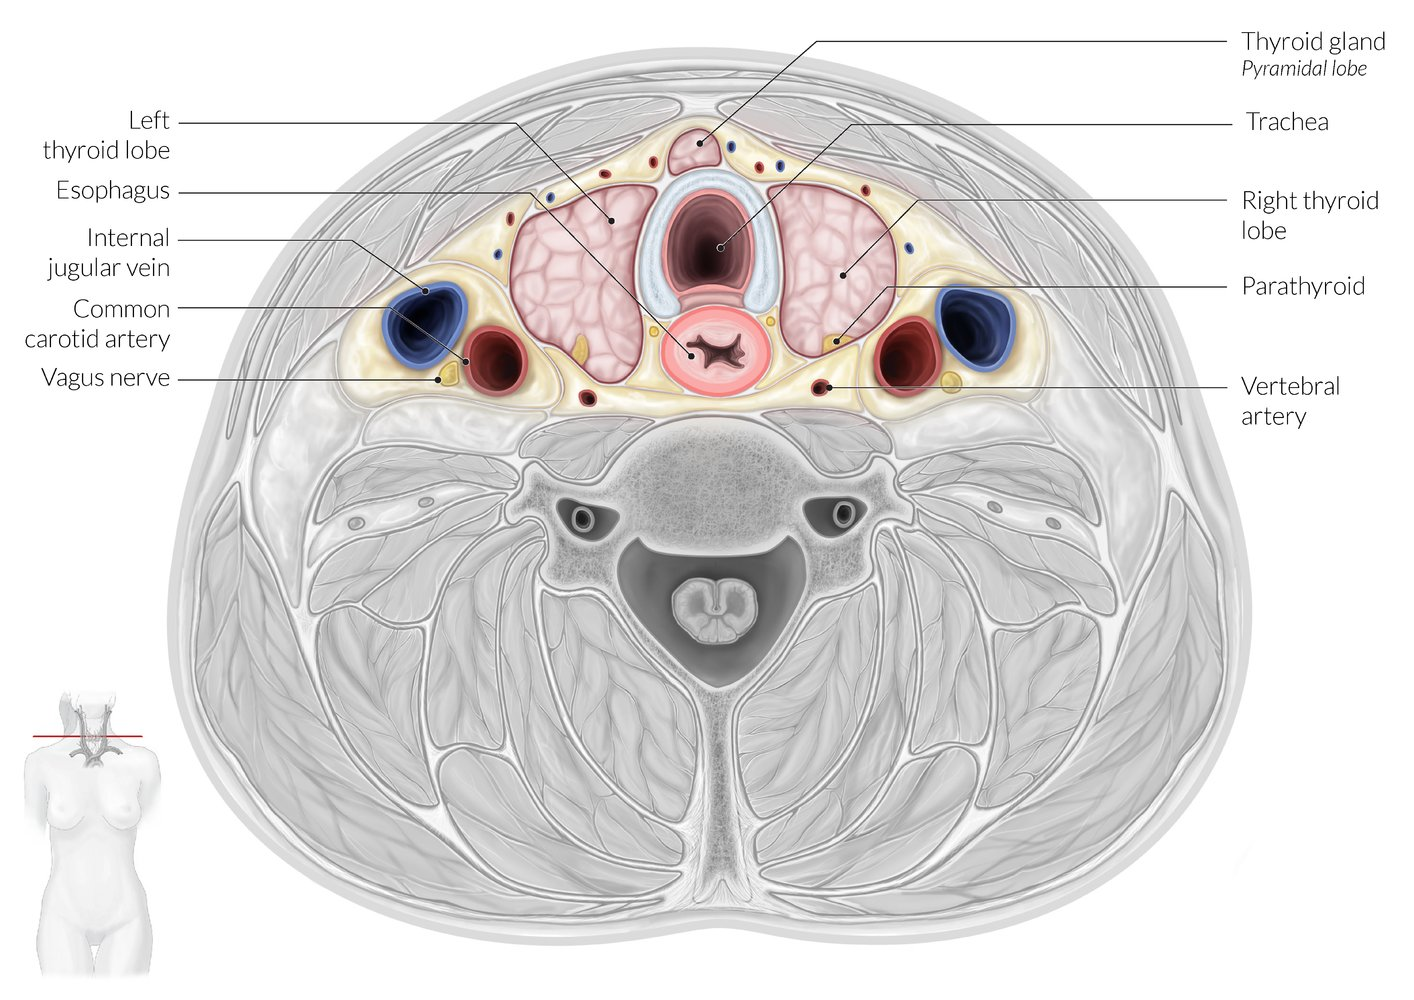
---

**YOU CAN:**
- Train for multiple classes
- Improve accuracy (longer training and bigger images)
- Import the custom detector on Python with Opencv
- Run detector in realtime on a Video or from a Webcam
- Integration with Google Drive (to save there weigths and images)
- Evaluate the accuracy of your Model

---


## **1. Installation**

Load your dataset

In [1]:
from google.colab import drive
drive.mount('/content/gdrive/',force_remount=True)

Mounted at /content/gdrive/


In [2]:
import os
import sys
sys.path.append("/content/gdrive/MyDrive/Colab Notebooks/Thyroid_Train_Mask_RCNN/Mask_RCNN/mrcnn")

In [3]:
%tensorflow_version 1.x
!pip install --upgrade h5py==2.10.0
#!unzip Mask_RCNN_basic_1.zip

#from m_rcnn import *
%matplotlib inline

TensorFlow 1.x selected.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
from m_rcnn import *

VERS 0.2


Using TensorFlow backend.


In [5]:
!nvidia-smi

Wed Jun 22 14:28:17 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## **2. Image Dataset**

Load your annotated dataset


In [6]:
# Extract Images
images_path = "images.zip"
annotations_path = "annotations.json"

extract_images(os.path.join("/content/gdrive/MyDrive/Colab Notebooks/Thyroid_Train_Mask_RCNN/Mask_RCNN/",images_path), "/content/gdrive/MyDrive/Colab Notebooks/Thyroid_Train_Mask_RCNN/Mask_RCNN/dataset")

Extracted: 43 images


In [8]:
dataset_train = load_image_dataset(os.path.join("/content/gdrive/MyDrive/Colab Notebooks/Thyroid_Train_Mask_RCNN/Mask_RCNN/", annotations_path), "/content/gdrive/MyDrive/Colab Notebooks/Thyroid_Train_Mask_RCNN/Mask_RCNN/dataset", "train")
dataset_val = load_image_dataset(os.path.join("/content/gdrive/MyDrive/Colab Notebooks/Thyroid_Train_Mask_RCNN/Mask_RCNN/", annotations_path), "/content/gdrive/MyDrive/Colab Notebooks/Thyroid_Train_Mask_RCNN/Mask_RCNN/dataset", "val")
class_number = dataset_train.count_classes()
print('Cantidad de imágenes a entrenar: %d imágenes' % len(dataset_train.image_ids))
print('Cantidad de imágenes a validar: %d imágenes' % len(dataset_val.image_ids))
print("Cantidad de clases: {} clases".format(class_number))

Annotation json path:  /content/gdrive/MyDrive/Colab Notebooks/Thyroid_Train_Mask_RCNN/Mask_RCNN/annotations.json
Annotation json path:  /content/gdrive/MyDrive/Colab Notebooks/Thyroid_Train_Mask_RCNN/Mask_RCNN/annotations.json
Cantidad de imágenes a entrenar: 39 imágenes
Cantidad de imágenes a validar: 4 imágenes
Cantidad de clases: 2 clases


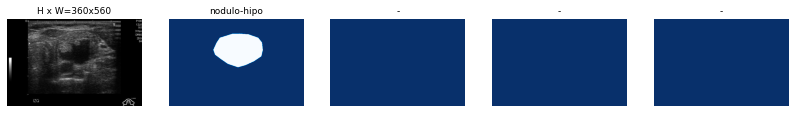

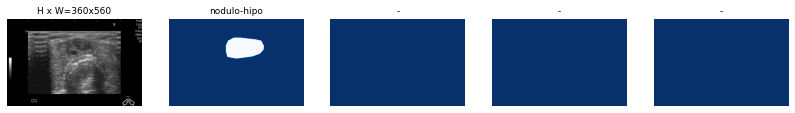

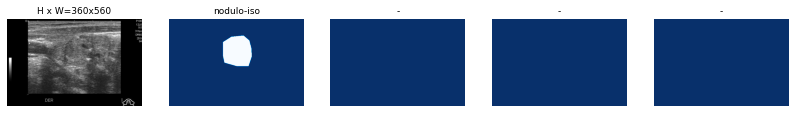

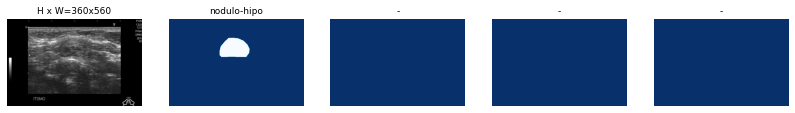

In [9]:
# Load image samples
display_image_samples(dataset_train)

##**3. Training**

Train Mask RCNN on your custom Dataset.

In [10]:
# Load Configuration
config = CustomConfig(class_number)
#config.display()
model = load_training_model(config)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
box_ind is deprecated, use box_indices instead
/content/gdrive/MyDrive/Colab Notebooks/Thyroid_Train_Mask_RCNN/Mask_RCNN/mask_rcnn_coco.h5


In [11]:
# Start Training
# This operation might take a long time.
train_head(model, dataset_train, dataset_train, config)


Starting at epoch 0. LR=0.001

Checkpoint Path: /content/gdrive/MyDrive/Colab Notebooks/Thyroid_Train_Mask_RCNN/Mask_RCNN/logs/object20220622T1430/mask_rcnn_object_{epoch:04d}.h5
Selecting layers to train
fpn_c5p5               (Conv2D)
fpn_c4p4               (Conv2D)
fpn_c3p3               (Conv2D)
fpn_c2p2               (Conv2D)
fpn_p5                 (Conv2D)
fpn_p2                 (Conv2D)
fpn_p3                 (Conv2D)
fpn_p4                 (Conv2D)
In model:  rpn_model
    rpn_conv_shared        (Conv2D)
    rpn_class_raw          (Conv2D)
    rpn_bbox_pred          (Conv2D)
mrcnn_mask_conv1       (TimeDistributed)
mrcnn_mask_bn1         (TimeDistributed)
mrcnn_mask_conv2       (TimeDistributed)
mrcnn_mask_bn2         (TimeDistributed)
mrcnn_class_conv1      (TimeDistributed)
mrcnn_class_bn1        (TimeDistributed)
mrcnn_mask_conv3       (TimeDistributed)
mrcnn_mask_bn3         (TimeDistributed)
mrcnn_class_conv2      (TimeDistributed)
mrcnn_class_bn2        (TimeDistributed)

## **4. Detection (test your model on a random image)**

In [12]:
# Load Test Model
# The latest trained model will be loaded
test_model, inference_config = load_test_model(class_number)



Instructions for updating:
Use `tf.cast` instead.
Loading weights from  /content/gdrive/MyDrive/Colab Notebooks/Thyroid_Train_Mask_RCNN/Mask_RCNN/logs/object20220622T1430/mask_rcnn_object_0010.h5
Re-starting from epoch 10


original_image           shape: (512, 512, 3)         min:    0.00000  max:  255.00000  uint8
Trained model result
Processing 1 images
image                    shape: (512, 512, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 512, 512, 3)      min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 15)               min:    0.00000  max:  512.00000  int64
anchors                  shape: (1, 65472, 4)         min:   -0.70849  max:    1.58325  float32
Annotation


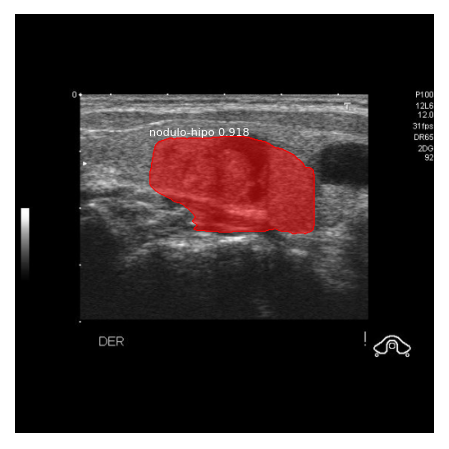

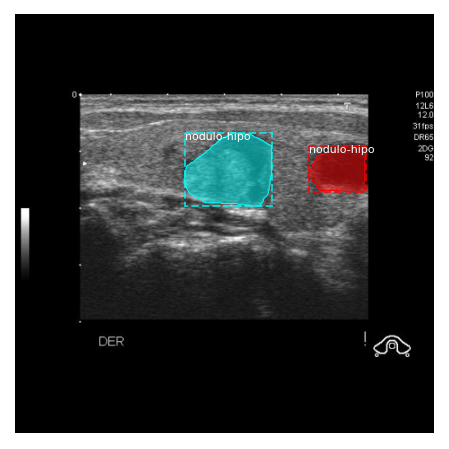

In [17]:
# Test on a random image
test_random_image(test_model, dataset_val, inference_config)